# Exp 1

In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

In [2]:
base = "./exp6_data"
data = glob(os.path.join(base, "*"))
data

['./exp6_data/exp1-1_600.txt',
 './exp6_data/exp1-1_400.txt',
 './exp6_data/exp2-1_alpha180.txt',
 './exp6_data/exp2-1_2296.txt',
 './exp6_data/exp2-1_4975.txt']

In [3]:
resonance_600 = []
with open(data[0], "r") as f:
    while True:
        try:
            n, Hz = map(int, f.readline().split())
            resonance_600.append((n, Hz))
        except:
            break

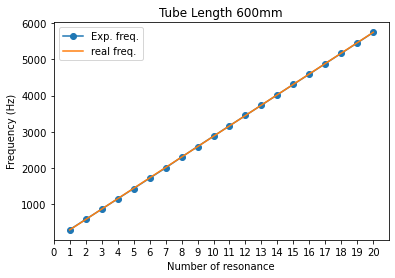

In [4]:
def plot_resonance(resonance, tube_length):
    ith_res = [n for n, Hz in resonance]
    frequency = [Hz for n, Hz in resonance]
    sound_speed = 345
    slope = 345/(2*(tube_length/1000))
    real_freq = np.array(ith_res)*slope
    plt.plot(ith_res, frequency, "-o")
    plt.plot(ith_res, real_freq)
    plt.xticks(np.arange(ith_res[-1]+1))
    plt.xlabel("Number of resonance")
    plt.ylabel("Frequency (Hz)")
    plt.legend(["Exp. freq.", "real freq."])
    plt.title(f"Tube Length {tube_length}mm")
    plt.show()
    
plot_resonance(resonance_600, 600)

In [5]:
resonance_400 = []
with open(data[1], "r") as f:
    while True:
        try:
            n, Hz = map(int, f.readline().split())
            resonance_400.append((n, Hz))
        except:
            break
  

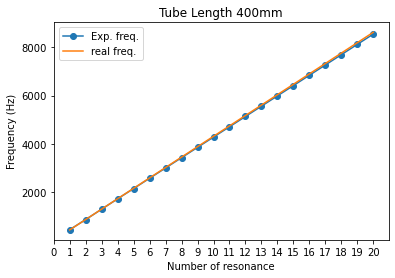

In [6]:
plot_resonance(resonance_400, 400)

# Exp 2

In [27]:
sphere = []
with open(data[2], "r") as f:
    while True:
        try:
            deg, mV = map(int, f.readline().split())
            sphere.append((deg, mV))
        except:
            break

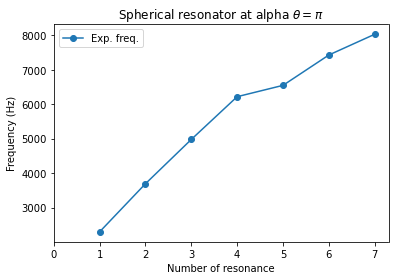

In [35]:
ith_res = [n for n, Hz in sphere]
frequency = [Hz for n, Hz in sphere]

plt.plot(ith_res, frequency, "-o")
# plt.plot(ith_res, real_freq)
plt.xticks(np.arange(ith_res[-1]+1))
plt.xlabel("Number of resonance")
plt.ylabel("Frequency (Hz)")
plt.legend(["Exp. freq."])
plt.title(f"Spherical resonator at alpha $\\theta = \\pi$")
plt.show()

### Fit data into $P_1(cos \theta) = Acos^2(\theta)$

In [21]:
legend1 = []
with open(data[-2], "r") as f:
    while True:
        try:
            deg, mV = map(int, f.readline().split())
            legend1.append((deg, mV))
        except:
            break

In [22]:
from scipy.optimize import curve_fit

def alpha_to_theta(theta):
    return np.arccos(0.5*np.cos(np.array(theta)*np.pi/180) - 0.5)

degrees = alpha_to_theta([d for d, v in legend1])
voltages = np.array([v for d, v in legend1])

def legendre_1(x, a):
    return a*np.cos(x)**2

pars, cov = curve_fit(f=legendre_1, xdata=degrees, ydata=voltages, p0=[0])

pars

array([277.25189315])

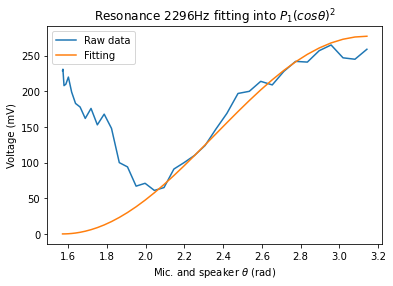

In [23]:
def plot_legendre(degrees, voltages, poly, deg, freq, pars):
    plt.plot(degrees, voltages)
    plt.plot(degrees, poly(degrees, *pars))
    plt.xlabel("Mic. and speaker $\\theta$ (rad)")
    plt.ylabel("Voltage (mV)")
    plt.title(f"Resonance {freq}Hz fitting into $P_{deg}(cos \\theta)^2$")
    plt.legend(["Raw data", "Fitting"])
    plt.show()
    
plot_legendre(degrees, voltages, legendre_1, 1, 2296, pars)

### Fit data into $P_3(cos \theta) = A(5cos^3 \theta - 3cos \theta)^2$

In [24]:
legend3 = []
with open(data[-1], "r") as f:
    while True:
        try:
            deg, mV = map(int, f.readline().split())
            legend3.append((deg, mV))
        except:
            break

In [25]:
degrees = alpha_to_theta([d for d, v in legend3])
voltages = np.array([v for d, v in legend3])

def legendre_3(x, a):
    return a*(5*np.cos(x)**3 - 3*np.cos(x))**2

pars, cov = curve_fit(f=legendre_3, xdata=degrees, ydata=voltages, p0=[0])

pars

array([263.04051379])

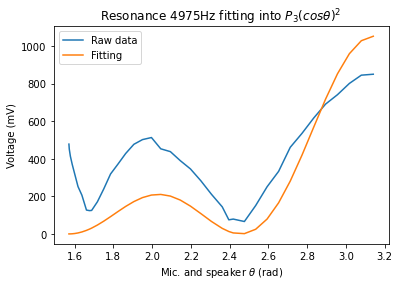

In [26]:
plot_legendre(degrees, voltages, legendre_3, 3, 4975, pars)

In [39]:
alpha_to_theta([0, 97, 180])*180/np.pi

array([ 90.        , 124.12046119, 180.        ])